<a href="https://colab.research.google.com/github/coldbilberry/repo-gui/blob/main/%D0%94%D0%97_R_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 6. Статистический анализ в R. Anova. Регрессионный анализ

Математическая модель - это описание поведения
какой-либо реальной случайной величины на языке
математики

## Линейная регрессия
В основе лежит предположение некой ЛИНЕЙНОЙ зависимости $Y \sim X$, где $Y$ – это зависимая переменная, а $X$ - независимая(-ые)

$Y= f(X)$

Для парной линейной регрессии, т.е. где только одна независимая
переменная (признак) $Х$, линейная зависимость будет иметь вид:

$y = \beta_0 + \beta_1 * X$

С помощью линейной регрессии попробуем описать зависимость переменной $y$ (верхнее давление) от переменной $Х$, в качестве которой мы будем рассматривать различные колонки и их комбинации из подготовленного набора данных tidy_set

In [ ]:
install.packages("rafalib")
install.packages("effsize")
install.packages("BSDA")
install.packages("pwr")
library(httr)
library(dplyr)
library(rafalib)
library(effsize)
library(BSDA)
library(pwr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice


Attaching package: ‘BSDA’


The following object is masked from ‘package:datasets’:

    Orange




In [ ]:
# Скачаем файл "cardio_train.csv"
filename <- "cardio_train.csv"
url <- "https://drive.google.com/uc?authuser=0&id=1qPKIRO3GfGNQK7rUFpZQWQRaNhTjHvJP&export=download"
GET(url, write_disk(filename, overwrite=TRUE))

Response [https://doc-00-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bel4859mumesqbugiaaphtc6oqpj9jjo/1685117025000/16531863302665455688/*/1qPKIRO3GfGNQK7rUFpZQWQRaNhTjHvJP?e=download&uuid=aa969280-fd7c-43b7-8963-730065c24ecd]
  Date: 2023-05-26 16:04
  Status: 200
  Content-Type: text/csv
  Size: 2.94 MB
<ON DISK>  cardio_train.csvNULL

In [ ]:
df <- read.csv(filename, sep=";")
head(df, 3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0
2,1,20228,1,156,85,140,90,3,1,0,0,1,1
3,2,18857,1,165,64,130,70,3,1,0,0,0,1


In [ ]:
df$age_years <- trunc(df$age / 365.25)

In [ ]:
tidy_set <- df %>% filter((ap_lo<200 & ap_lo>20) & (ap_hi<300 & ap_hi>40))
head(tidy_set)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,51
4,3,17623,2,169,82,150,100,1,1,0,0,1,1,48
5,4,17474,1,156,56,100,60,1,1,0,0,0,0,47
6,8,21914,1,151,67,120,80,2,2,0,0,0,0,59


In [ ]:
tidy_set <- tidy_set[tidy_set$ap_hi > tidy_set$ap_lo,]
head(tidy_set)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,51
4,3,17623,2,169,82,150,100,1,1,0,0,1,1,48
5,4,17474,1,156,56,100,60,1,1,0,0,0,0,47
6,8,21914,1,151,67,120,80,2,2,0,0,0,0,59


In [ ]:
dim(tidy_set)

[1] 68678    14

In [ ]:
set.seed(1)
ind <- sample(seq(1, nrow(tidy_set)), 100)
ind

[1] 24388 59521 43307 11571 25173 32618 13903  8229 25305 22306 12204 43809
 [13] 36244 45399  6519 19242 21875 58472 62956 21323 13284  7976  9392  3863
 [25] 52253 26876 13973 31334 39241 47959 28278 66394 11367 13602  5051 16920
 [37] 29660 56659 29697 11854 58661 51118 27075 22126 55091 58684 32987 12399
 [49] 25488 60772 55084 51305 17626  8465  6563 62126 20205 62480 68581 55968
 [61]  8615 41381 45196  9346 13824  8696 61798 61140 39557  7131 61256 51613
 [73] 10816 49461 11096 12597 24450  8613 44660  6217 30249 64953 12669 47181
 [85] 32441 23193 40942 20480 62492 68663 23836 11260  4182 27416 18540  5390
 [97] 30929 21842 18144 30407

In [ ]:
ts <- tidy_set[ind,]
head(ts)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
24430,35507,15867,1,160,64,130,90,3,1,0,0,1,1,43
59613,86607,21740,1,159,62,110,70,1,2,0,0,1,1,59
43372,63061,19710,1,160,65,120,80,1,1,0,0,1,1,53
11592,16855,21865,1,164,68,120,80,1,1,0,0,1,0,59
25217,36636,23277,1,157,87,120,80,1,1,0,0,0,1,63
32669,47515,17551,2,167,78,140,100,1,1,0,0,0,1,48


In [ ]:
dim(ts)

[1] 100  14

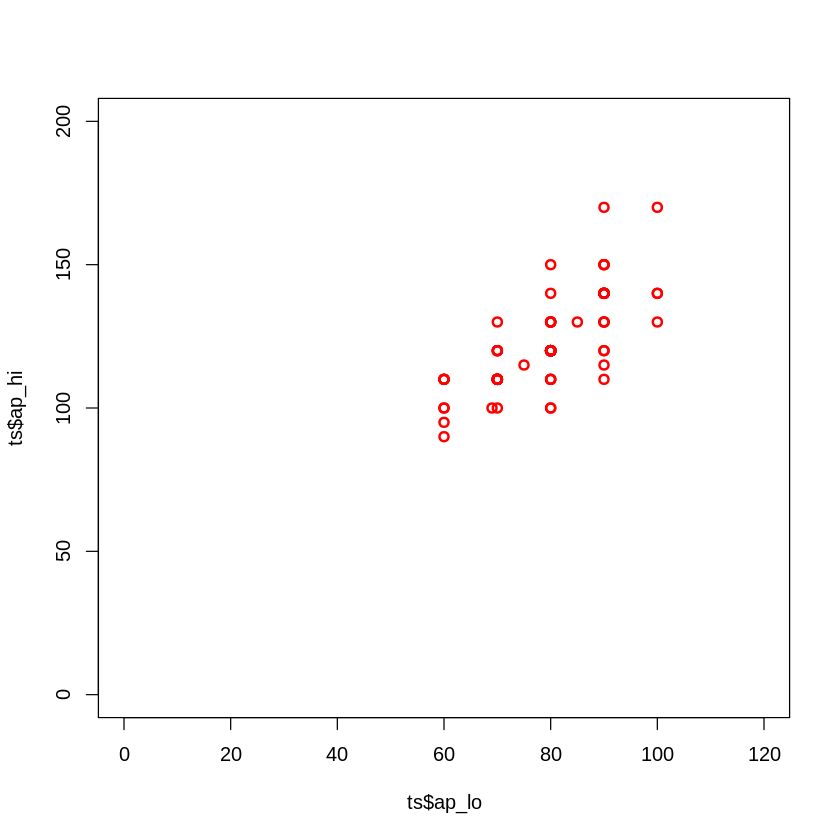

In [ ]:
plot(ts$ap_lo, ts$ap_hi, xlim=c(0,120), ylim=c(0,200), col="red", lwd=2)

Из графика видно, что прослеживается линейная зависимость
между нижним и верхним давлением пациента

## Функции lm() и predict()

Построим парную линейную регрессию, в качестве независимой переменной возьмем нижнее давление пациента

In [ ]:
fitm <- lm(ts$ap_hi ~ ts$ap_lo)
fitm


Call:
lm(formula = ts$ap_hi ~ ts$ap_lo)

Coefficients:
(Intercept)     ts$ap_lo  
     32.961        1.121  


In [ ]:
hi_hat <- 32.961 + 1.121 * ts$ap_lo
hi_hat

[1] 133.851 111.431 122.641 122.641 122.641 145.061 122.641 133.851 133.851
 [10] 122.641 122.641 133.851 111.431 111.431 111.431 133.851 111.431 117.036
 [19] 133.851 122.641 122.641 122.641 100.221 133.851 122.641 122.641 122.641
 [28] 122.641 122.641 122.641 122.641 122.641 122.641 111.431 122.641 100.221
 [37] 122.641 122.641 122.641 122.641 122.641 133.851 122.641 133.851 111.431
 [46] 122.641 133.851 128.246 122.641 133.851 100.221 110.310 122.641 133.851
 [55] 111.431 122.641 133.851 133.851 111.431 111.431 122.641 133.851 111.431
 [64] 122.641 122.641 133.851 122.641 100.221 122.641 111.431 145.061 111.431
 [73] 111.431 111.431 111.431 145.061 122.641 122.641 122.641 122.641 111.431
 [82] 122.641 122.641 122.641 100.221 100.221 133.851 133.851 133.851 122.641
 [91] 133.851 122.641 122.641 111.431 122.641 122.641 122.641 100.221 100.221
[100] 145.061

Функция predict() упрощает вычисления оценочного параметра, ее особенно удобно использовать, когда имеем дело не с одним Х


In [ ]:
as.numeric(predict(fitm, ts))

[1] 133.8566 111.4353 122.6460 122.6460 122.6460 145.0673 122.6460 133.8566
  [9] 133.8566 122.6460 122.6460 133.8566 111.4353 111.4353 111.4353 133.8566
 [17] 111.4353 117.0406 133.8566 122.6460 122.6460 122.6460 100.2247 133.8566
 [25] 122.6460 122.6460 122.6460 122.6460 122.6460 122.6460 122.6460 122.6460
 [33] 122.6460 111.4353 122.6460 100.2247 122.6460 122.6460 122.6460 122.6460
 [41] 122.6460 133.8566 122.6460 133.8566 111.4353 122.6460 133.8566 128.2513
 [49] 122.6460 133.8566 100.2247 110.3142 122.6460 133.8566 111.4353 122.6460
 [57] 133.8566 133.8566 111.4353 111.4353 122.6460 133.8566 111.4353 122.6460
 [65] 122.6460 133.8566 122.6460 100.2247 122.6460 111.4353 145.0673 111.4353
 [73] 111.4353 111.4353 111.4353 145.0673 122.6460 122.6460 122.6460 122.6460
 [81] 111.4353 122.6460 122.6460 122.6460 100.2247 100.2247 133.8566 133.8566
 [89] 133.8566 122.6460 133.8566 122.6460 122.6460 111.4353 122.6460 122.6460
 [97] 122.6460 100.2247 100.2247 145.0673

Причина различий оценочных значений $y$ кроется в округлении вычислений

In [ ]:
signif(fitm$coefficients, 10)

(Intercept)    ts$ap_lo 
  32.960740    1.121065

In [ ]:
32.96074004 + 1.121065203*ts$ap_lo

[1] 133.8566 111.4353 122.6460 122.6460 122.6460 145.0673 122.6460 133.8566
  [9] 133.8566 122.6460 122.6460 133.8566 111.4353 111.4353 111.4353 133.8566
 [17] 111.4353 117.0406 133.8566 122.6460 122.6460 122.6460 100.2247 133.8566
 [25] 122.6460 122.6460 122.6460 122.6460 122.6460 122.6460 122.6460 122.6460
 [33] 122.6460 111.4353 122.6460 100.2247 122.6460 122.6460 122.6460 122.6460
 [41] 122.6460 133.8566 122.6460 133.8566 111.4353 122.6460 133.8566 128.2513
 [49] 122.6460 133.8566 100.2247 110.3142 122.6460 133.8566 111.4353 122.6460
 [57] 133.8566 133.8566 111.4353 111.4353 122.6460 133.8566 111.4353 122.6460
 [65] 122.6460 133.8566 122.6460 100.2247 122.6460 111.4353 145.0673 111.4353
 [73] 111.4353 111.4353 111.4353 145.0673 122.6460 122.6460 122.6460 122.6460
 [81] 111.4353 122.6460 122.6460 122.6460 100.2247 100.2247 133.8566 133.8566
 [89] 133.8566 122.6460 133.8566 122.6460 122.6460 111.4353 122.6460 122.6460
 [97] 122.6460 100.2247 100.2247 145.0673


Call:
lm(formula = ts$ap_hi ~ ts$ap_lo)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.857  -2.646  -2.646   6.143  36.143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  32.9607     8.2713   3.985  0.00013 ***
ts$ap_lo      1.1211     0.1036  10.821  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.675 on 98 degrees of freedom
Multiple R-squared:  0.5444,	Adjusted R-squared:  0.5397 
F-statistic: 117.1 on 1 and 98 DF,  p-value: < 2.2e-16


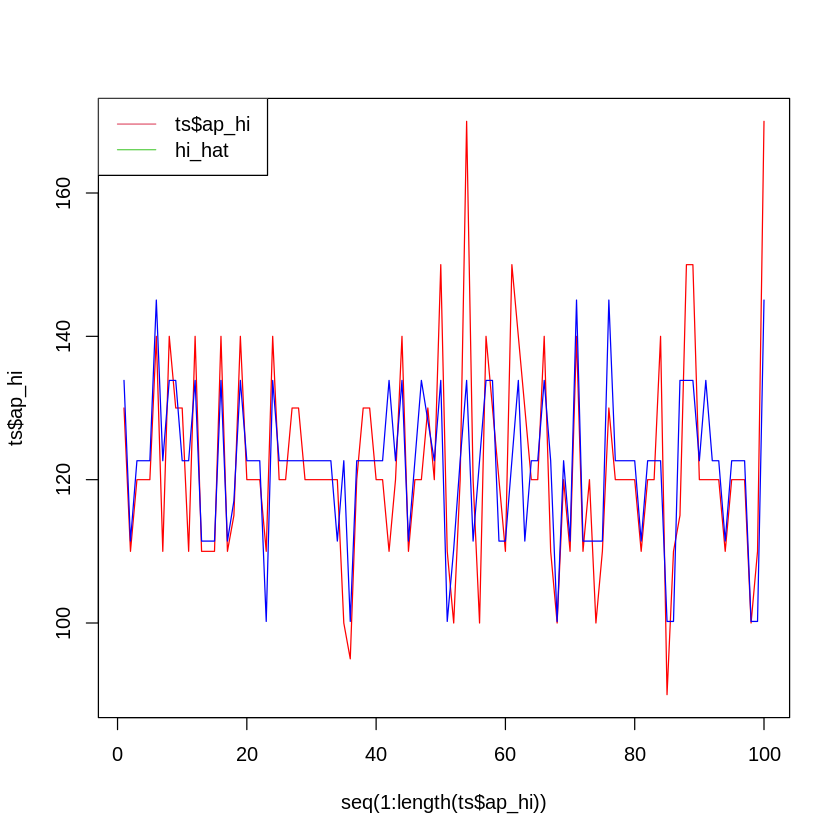

In [ ]:
plot(seq(1:length(ts$ap_hi)), ts$ap_hi, col="red", type="l")
lines(seq(1, length(hi_hat)), hi_hat, col="blue", type="l")
legend("topleft", c("ts$ap_hi", "hi_hat"), col=c(2,3), lty=c(1,1))
summary(fitm)

1. Формула
2. Residuals: Распределение остатков
3. Coefficients: Значение коэффициентов для подобранной модели, значимость коэффициентов модели (t-критерий)
4. Residual standard error
5. Multiple R-squared коэффициент детерминации
6. F-statistic: Значимость модели в целом (F-критерий)

### Residuals:

Одним из важных условий для построения модели
линейной регрессии является предположение, что
ошибки следуют нормальному распределению

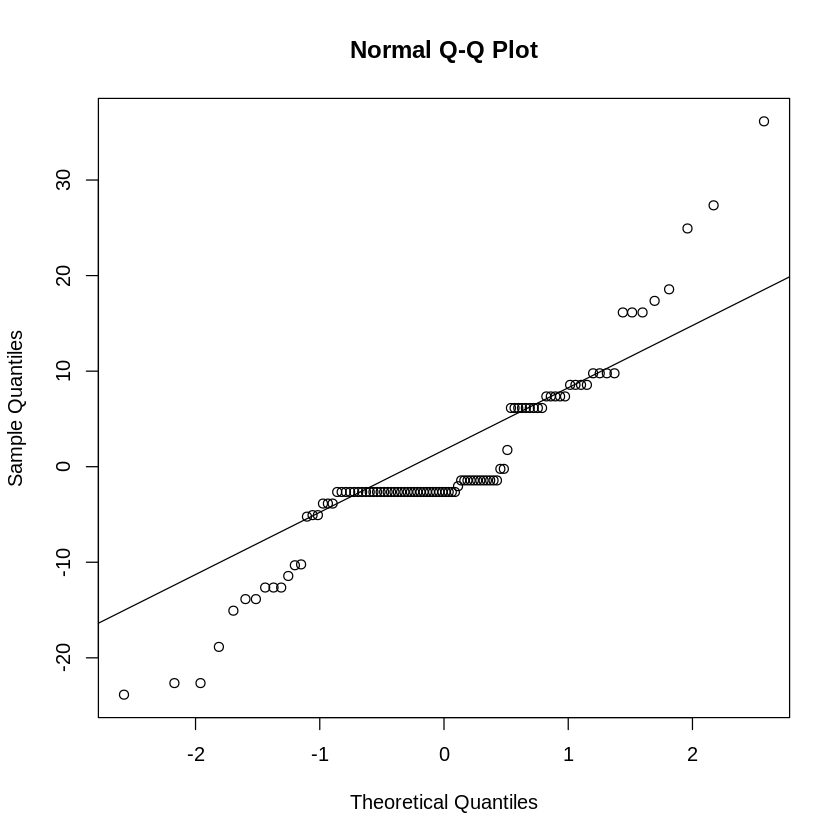

In [ ]:
qqnorm(fitm$residuals)
qqline(fitm$residuals)

### Coefficients:

С помощью t-статистики Стьюдента можно проверить значимость коэффициентов построенной модели

In [ ]:
summary(fitm)


Call:
lm(formula = ts$ap_hi ~ ts$ap_lo)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.857  -2.646  -2.646   6.143  36.143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  32.9607     8.2713   3.985  0.00013 ***
ts$ap_lo      1.1211     0.1036  10.821  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.675 on 98 degrees of freedom
Multiple R-squared:  0.5444,	Adjusted R-squared:  0.5397 
F-statistic: 117.1 on 1 and 98 DF,  p-value: < 2.2e-16


R дает значения t-статистики, p-value и с помощью «*» отмечает наиболее значимые коэффициенты.

В строке Signif.codes приведена расшифровка обозначений: например, «***» соответствуют p-value, лежащей между нулем и 0.001

### Residual Standard Error:

RSE вычисляется следующим образом

In [ ]:
rse <- sqrt(sum(residuals(fitm)^2) / fitm$df.residual)
rse

[1] 9.674722

98 степеней свободы = k-n-1, где k - объем выборки, n - число предикторов (в нашем случае 1 предиктор - это нижнее давление)

### R-squared:

Коэффициент детерминации. Показывает, какую часть изменчивости величины y описала построенная модель. Посчитать эту величину можно следующим образом:


In [ ]:
Rs <- cor(ts$ap_hi, ts$ap_lo)^2
Rs

[1] 0.5443829

С увеличением числа предикторов коэффициент детерминации растет

### Adjusted R-squared:

Решает эту проблему. Если добавленные новые предикторы не
вносят весомого вклада в модель, то этот параметр будет падать, в противном случае - расти


In [ ]:
R_adj <- 1-((1-Rs)*((100-1)/(100-1-1)))
R_adj

[1] 0.5397338

### F-statistic:

Позволяет оценить значимость построенной модели в целом

In [ ]:
tsn <- ts[,-c(1,2)]
head(tsn)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
24430,1,160,64,130,90,3,1,0,0,1,1,43
59613,1,159,62,110,70,1,2,0,0,1,1,59
43372,1,160,65,120,80,1,1,0,0,1,1,53
11592,1,164,68,120,80,1,1,0,0,1,0,59
25217,1,157,87,120,80,1,1,0,0,0,1,63
32669,2,167,78,140,100,1,1,0,0,0,1,48


In [ ]:
fit <- lm(tsn$ap_hi~., data=tsn)
summary(fit)


Call:
lm(formula = tsn$ap_hi ~ ., data = tsn)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.224  -5.954   0.527   3.642  31.716 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.286256  25.391474   0.956 0.341454    
gender      -3.615951   2.551325  -1.417 0.159931    
height       0.044289   0.157848   0.281 0.779689    
weight       0.007098   0.074875   0.095 0.924695    
ap_lo        1.049879   0.110798   9.476  4.3e-15 ***
cholesterol  0.232651   1.801735   0.129 0.897553    
gluc         0.400740   2.101891   0.191 0.849234    
smoke        0.452179   6.675098   0.068 0.946145    
alco         5.897386   5.878351   1.003 0.318497    
active       0.336393   2.355827   0.143 0.886781    
cardio       7.982523   2.229914   3.580 0.000562 ***
age_years    0.121480   0.146599   0.829 0.409540    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.168 on 88 degrees of freedom
Multiple R-squared

## ANOVA

Дисперсионный анализ (ANOVA - analysis of variance) используется, когда мы хотим выяснить влияние одного или нескольких факторов (качественных переменных) на количественную переменную (отклик).

Используем, чтобы избежать множественных
сравнений, которые приводят к росту вероятности
ошибки первого рода.

При использовании поправок на множественные
сравнения, растет вероятность ошибки второго рода с
ужесточением уровня значимости.

Задача сводится к сравнению средних арифметических по подгруппам.

В ANOVA мы имеем дело с:
- объясненной (факторной дисперсией, межгрупповой)
- необъясненной (внутригрупповой)

На данном рисунке видно, что межгрупповая
дисперсия очень мала, что предполагает, что
данный фактор не оказывает влияния на числовую переменную. С помощью ANOVA мы можем проверить
наше предположение

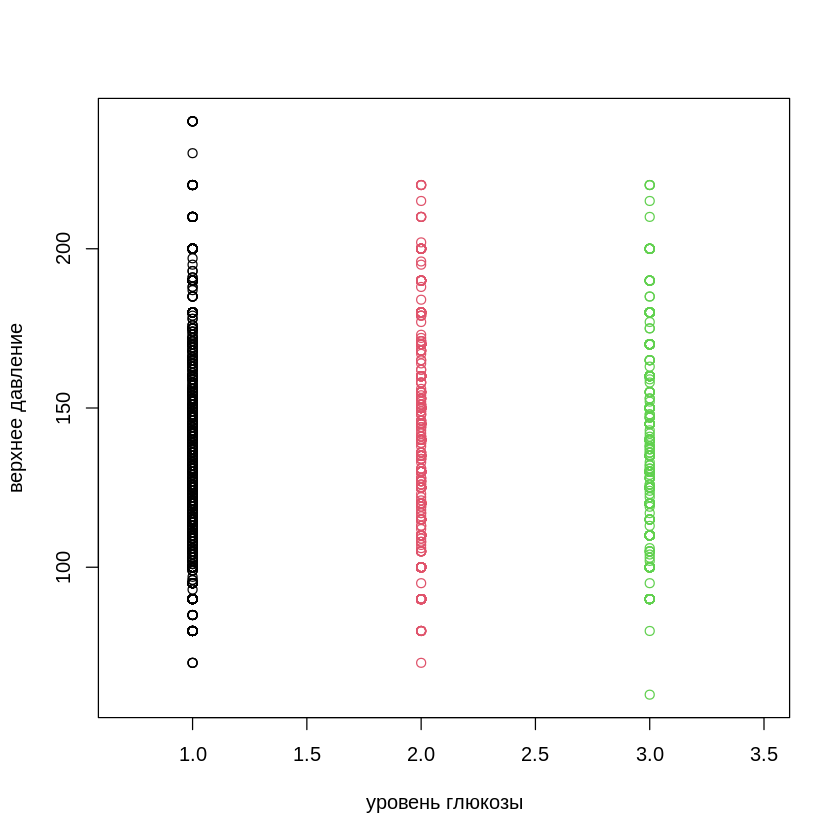

In [ ]:
plot(
    tidy_set$gluc, tidy_set$ap_hi, cex=1, col=tidy_set$gluc,
    xlab="уровень глюкозы", ylab="верхнее давление", xlim=c(0.7, 3.5)
)

## Три важных условия при проведении дисперсионного анализа:

1. Случайность и независимость измерений - **ОБЯЗАТЕЛЬНОЕ**
2. Переменная-отклик следует нормальному распределению в группах
3. Гомоскедастичность дисперсий

При невыполнении 2 или 3 условия дисперсионного анализа растет вероятность принять значимые факторы за незначимые.

Но ко 2 условию ANOVA менее чувствителен.

Если одно из этих условий не выполняется, следует это отметить в конечном
результате исследования

## Сбалансированные и несбалансированные данные

Если данные имеют разное количество наблюдений в группе, то мы имеем дело с несбалансированными данными

In [ ]:
# работаем с выборкой
set.seed(1)
ind <- sample(seq(1, nrow(tidy_set)), 100)
ind

[1] 24388 59521 43307 11571 25173 32618 13903  8229 25305 22306 12204 43809
 [13] 36244 45399  6519 19242 21875 58472 62956 21323 13284  7976  9392  3863
 [25] 52253 26876 13973 31334 39241 47959 28278 66394 11367 13602  5051 16920
 [37] 29660 56659 29697 11854 58661 51118 27075 22126 55091 58684 32987 12399
 [49] 25488 60772 55084 51305 17626  8465  6563 62126 20205 62480 68581 55968
 [61]  8615 41381 45196  9346 13824  8696 61798 61140 39557  7131 61256 51613
 [73] 10816 49461 11096 12597 24450  8613 44660  6217 30249 64953 12669 47181
 [85] 32441 23193 40942 20480 62492 68663 23836 11260  4182 27416 18540  5390
 [97] 30929 21842 18144 30407

In [ ]:
ts <- tidy_set[ind,]
head(ts)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
24430,35507,15867,1,160,64,130,90,3,1,0,0,1,1,43
59613,86607,21740,1,159,62,110,70,1,2,0,0,1,1,59
43372,63061,19710,1,160,65,120,80,1,1,0,0,1,1,53
11592,16855,21865,1,164,68,120,80,1,1,0,0,1,0,59
25217,36636,23277,1,157,87,120,80,1,1,0,0,0,1,63
32669,47515,17551,2,167,78,140,100,1,1,0,0,0,1,48


In [ ]:
table(ts$gluc)


 1  2  3 
81 12  7 

In [ ]:
table(ts$gender, ts$gluc)

   
     1  2  3
  1 49 11  6
  2 32  1  1

- Если размеры выборок одинаковые, то неоднородность дисперсий слабо влияет на результат. Несбалансированные данные особенно важны при неоднородности дисперсий
- Слабые отклонения от нормальности не сильно влияют на результат. В однофакторном дисперсионном анализе при больших объемах выборок можно пренебречь этим условием

Если данные имеют дисбаланс, то ANOVA становится более чувствительным к нарушениям условий его применения. Нарушение условий ведет к росту вероятности ошибки первого рода

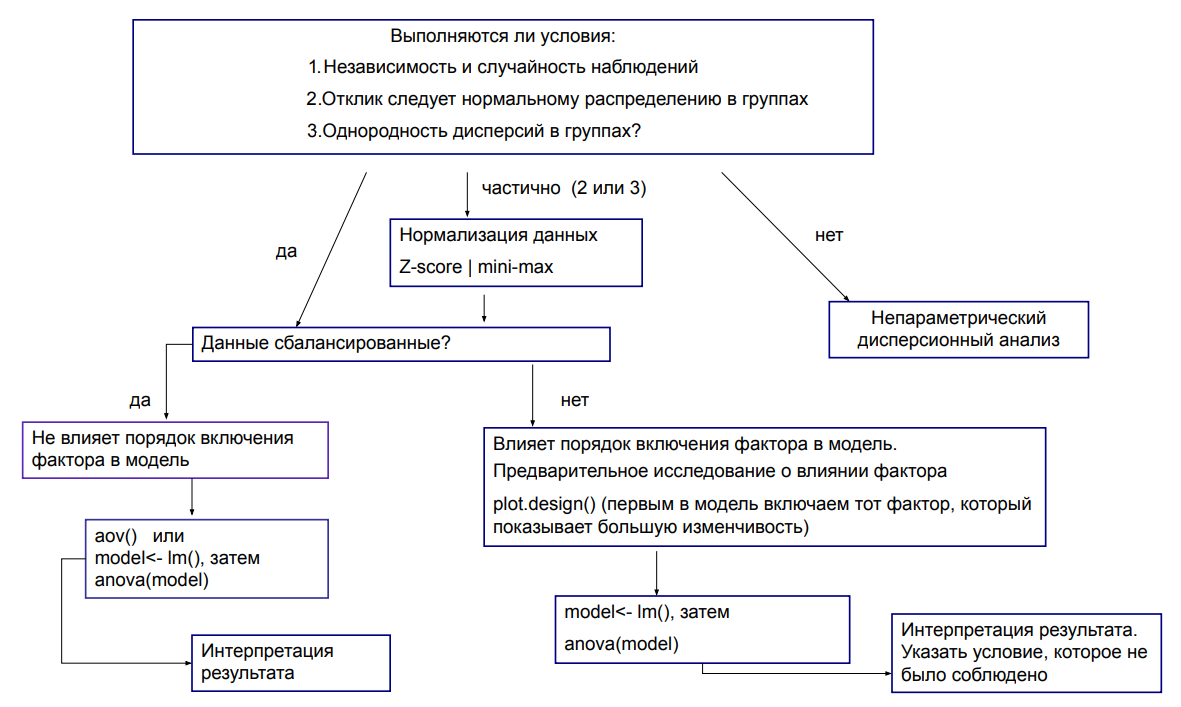

### ВЫВОД: стараемся делать одинаковые выборки

## Задача: проведем исследование влияния 2-х факторов: пол и уровень глюкозы на верхнее давление
### 1. Берем выборки. Соблюдаем условие случайности и независимости

In [ ]:
head(tidy_set)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,51
4,3,17623,2,169,82,150,100,1,1,0,0,1,1,48
5,4,17474,1,156,56,100,60,1,1,0,0,0,0,47
6,8,21914,1,151,67,120,80,2,2,0,0,0,0,59


In [ ]:
set.seed(1)
# g1 - gluc == 1; s1 - gender == 1
# g2 - gluc == 2; s2 - gender == 2
g1_s1 <- sample(tidy_set$ap_hi[tidy_set$gluc==1 & tidy_set$gender==1], 20)
g1_s1
g1_s2 <- sample(tidy_set$ap_hi[tidy_set$gluc==1 & tidy_set$gender==2], 20)
g1_s2

g2_s1 <- sample(tidy_set$ap_hi[tidy_set$gluc==2 & tidy_set$gender==1], 20)
g2_s1
g2_s2 <- sample(tidy_set$ap_hi[tidy_set$gluc==2 & tidy_set$gender==2], 20)
g2_s2

g3_s1 <- sample(tidy_set$ap_hi[tidy_set$gluc==3 & tidy_set$gender==1], 20)
g3_s1
g3_s2 <- sample(tidy_set$ap_hi[tidy_set$gluc==3 & tidy_set$gender==2], 20)
g3_s2

[1] 110 120 110 140 120 110 120 115 120 160 130 140 120 140 140 150 140 120 120
[20] 130

[1] 120  90 120 170 130 120 100 110 120 120 120 120 135 130 120 140  90 110 120
[20] 130

[1] 170 130 130 130 130 120 120 105 130 120 120 100 150 130 120 140 130 120 130
[20] 180

[1] 150 140 160 140 130 140 120 180 140 140 140 120 140 120 130 110 120 120 150
[20] 120

[1] 120 140 130 140 150 140 120 110 180 200 120 130 140 120 110 140 150 150 140
[20] 120

[1] 120 130 130 145 120 140 140 120 160 120 120 150 130 120 145 120 130 150 120
[20] 150

### На этом этапе цель: построить датафрейм

In [ ]:
# новый вектор "gender_new" и "gluc_new"
gender_new <- c(rep(1,20), rep(2,20), rep(1,20), rep(2,20), rep(1,20), rep(2,20))
gender_new

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2

In [ ]:
gluc_new <- c(rep(1,40), rep(2,40), rep(3,40))
gluc_new

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3

In [ ]:
sam_s <-c(g1_s1, g1_s2, g2_s1, g2_s2, g3_s1, g3_s2)
sam_s

[1] 110 120 110 140 120 110 120 115 120 160 130 140 120 140 140 150 140 120
 [19] 120 130 120  90 120 170 130 120 100 110 120 120 120 120 135 130 120 140
 [37]  90 110 120 130 170 130 130 130 130 120 120 105 130 120 120 100 150 130
 [55] 120 140 130 120 130 180 150 140 160 140 130 140 120 180 140 140 140 120
 [73] 140 120 130 110 120 120 150 120 120 140 130 140 150 140 120 110 180 200
 [91] 120 130 140 120 110 140 150 150 140 120 120 130 130 145 120 140 140 120
[109] 160 120 120 150 130 120 145 120 130 150 120 150

In [ ]:
anovaframe <- data.frame(sam_s, gender_new, gluc_new)  # соблюдаются случайность и независимость
head(anovaframe, 25)

,sam_s,gender_new,gluc_new
,<int>,<dbl>,<dbl>
1,110,1,1
2,120,1,1
3,110,1,1
4,140,1,1
5,120,1,1
6,110,1,1
7,120,1,1
8,115,1,1
9,120,1,1


In [ ]:
table(anovaframe$gender_new, anovaframe$gluc_new)

   
     1  2  3
  1 20 20 20
  2 20 20 20

### 2) Разведочный анализ
### 2.1) Для наглядности представим данные графически

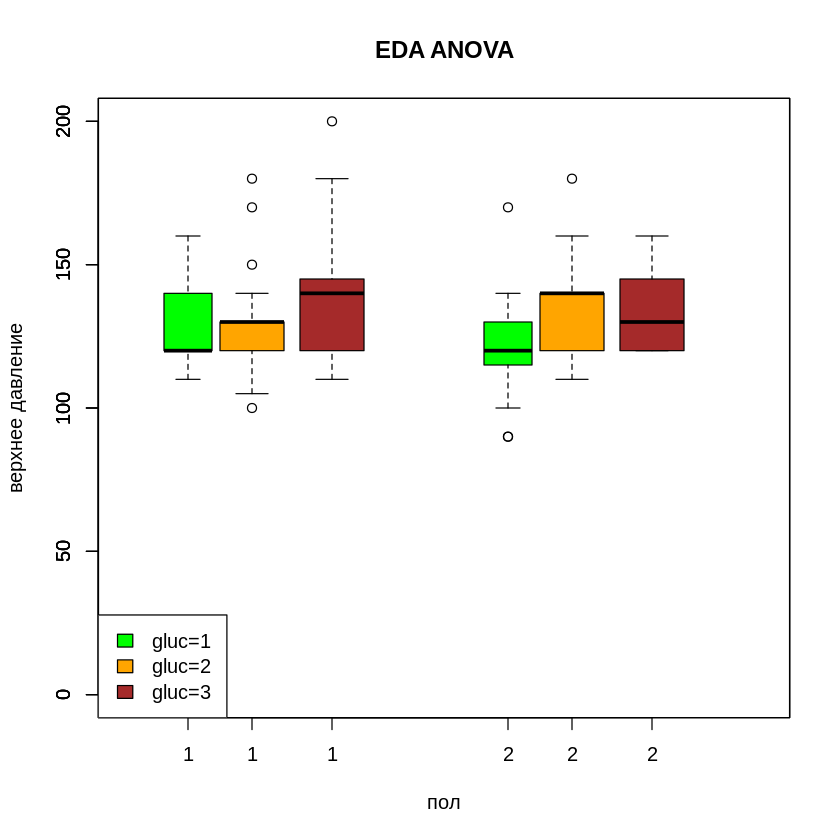

In [ ]:
boxplot(
    sam_s~gender_new, data=anovaframe, boxwex=0.15, at=1:2-0.3,
    subset=gluc_new==1, col="green", main="EDA ANOVA",
    xlab="пол", ylab="верхнее давление",
    xlim=c(0.5, 2.5), ylim=c(0, 200)
)
boxplot(
    sam_s~gender_new, data=anovaframe, add=TRUE,
    boxwex=0.2, at=1:2-0.1, subset=gluc_new==2, col="orange"
)
boxplot(
    sam_s~gender_new, data=anovaframe, add=TRUE,
    boxwex=0.2, at=1:2+0.15, subset=gluc_new==3, col="brown"
)
legend(
    "bottomleft",
    c("gluc=1", "gluc=2", "gluc=3"),
    fill=c("green", "orange", "brown")
)

Видим небольшую неоднородность дисперсий

### 2.2. Помимо визуальной оценки однородности дисперсий (п. 2.1) проверим гомоскедастичность с помощью специальных критериев

Распространенные критерии:



Критерий  | Функция | Условия применения
-------------------|------------------|------------------
F- критерий |var.test() | 1) Для сравнения 2-х дисперсий <br><br> 2) Возможен разный объем выборок
Критерий Бартлетта | bartlett.test() | 1) Для множественных сравнений <br><br> 2) Объемы выборки могут быть различны, но не менее 3 <br><br> 3) Должно соблюдаться условие нормальности. <br><br> Тест очень чувствительный к нарушению этого условия
Критерий Кохрена |cochran.test() <br><br> package "outliers"|1) Для множественных авнений <br><br> 2) Одинаковый объем выборок
Критерий Левенэ |leveneTest() <br><br> package "car"| Аналог критерий Балетта, но читается менее чувствительным <br><br> к нарушению условия нормальности

### Воспользуемся критерием Бартлетта

Условие нормальности соблюдается хорошо

In [ ]:
bartlett.test(list(g1_s1, g1_s2, g2_s1, g2_s2, g3_s1, g3_s2))


	Bartlett test of homogeneity of variances

data:  list(g1_s1, g1_s2, g2_s1, g2_s2, g3_s1, g3_s2)
Bartlett's K-squared = 6.5385, df = 5, p-value = 0.2573


Принимаем нулевую гипотезу на уровне значимости 0.05.

Статистически значимых различий между дисперсиями выборок нет.

Все условия соблюдены. Теперь можно приступать непосредственно к самому дисперсионному анализу

### 2.3) Проверим предположение о нормальности распределений с помощью qq-графика

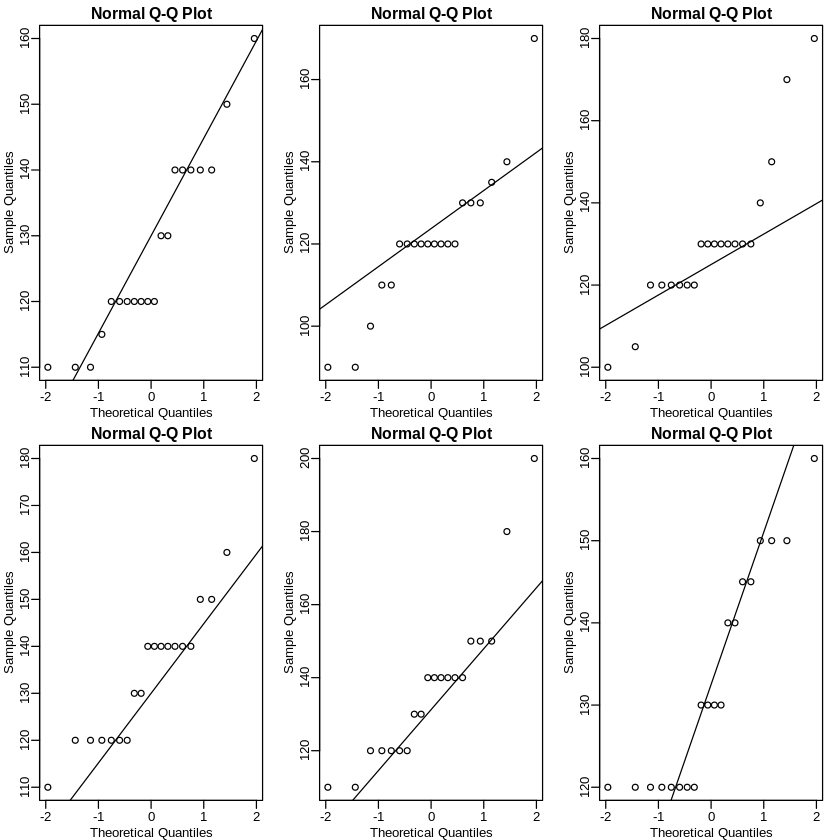

In [ ]:
mypar(2,3)
qqnorm(g1_s1)
qqline(g1_s1)
qqnorm(g1_s2)
qqline(g1_s2)
qqnorm(g2_s1)
qqline(g2_s1)
qqnorm(g2_s2)
qqline(g2_s2)
qqnorm(g3_s1)
qqline(g3_s1)
qqnorm(g3_s2)
qqline(g3_s2)

Есть совсем небольшие отклонения. Нас это устаивает. Тем более, что мы имеем одинаковые объемы выборок

Сбалансированные данные НЕ влияют на порядок включения факторов в модель

In [ ]:
summary(aov(sam_s~gender_new + gluc_new + gender_new:gluc_new, data=anovaframe))

                     Df Sum Sq Mean Sq F value  Pr(>F)   
gender_new            1    130   130.2   0.426 0.51532   
gluc_new              1   2420  2420.0   7.915 0.00576 **
gender_new:gluc_new   1     31    31.2   0.102 0.74978   
Residuals           116  35468   305.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
summary(aov(sam_s~gluc_new + gender_new + gluc_new:gender_new, data=anovaframe))

                     Df Sum Sq Mean Sq F value  Pr(>F)   
gluc_new              1   2420  2420.0   7.915 0.00576 **
gender_new            1    130   130.2   0.426 0.51532   
gluc_new:gender_new   1     31    31.2   0.102 0.74978   
Residuals           116  35468   305.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Чтобы не прописывать эффект взаимодействия, факторы в модели указывают с помощью знака «*»

In [ ]:
summary(aov(sam_s~gender_new * gluc_new, data=anovaframe))

                     Df Sum Sq Mean Sq F value  Pr(>F)   
gender_new            1    130   130.2   0.426 0.51532   
gluc_new              1   2420  2420.0   7.915 0.00576 **
gender_new:gluc_new   1     31    31.2   0.102 0.74978   
Residuals           116  35468   305.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Интерпретация результата

Взаимодействие факторов «уровень глюкозы» и «пол», а также сами факторы не оказывают значимого эффекта на давление пациента на уровне значимости 0.05.

## Приобретенные навыки:

1. Научились подбирать линейную модель с помощью функции lm()
2. Интерпретировать результат: оценивать значимость коэффициентов (критерий t) и самой модели в целом (критерий F)
3. Рассмотрели чем отличаются параметры $R$ и $R_{adj}$
4. Рассмотрели условия для проведения ANOVA
5. Составили общую схему действий для ANOVA при сбалансированных и несбалансированных данных
6. Изучили различные методы в R проверки выборок на однородность дисперсий
7. Интерпретировали конечный результат статистического анализа
